In [0]:
!pip install investpy==0.9.7

     |████████████████████████████████| 3.9MB 2.8MB/s 
     |████████████████████████████████| 245kB 41.5MB/s 
     |████████████████████████████████| 5.8MB 27.1MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
  Created wheel for investpy: filename=investpy-0.9.7-cp36-none-any.whl size=7870309 sha256=2e27b7258730c5a4550668fb6660c5e29ebfd31a55b8aa14edacbd8e5824cd30
  Stored in directory: /root/.cache/pip/wheels/e7/93/79/08c1eaaaca0c52b25640f6a29dc164b9213c0c5e84c64733ad
Successfully built investpy
ERROR: google-colab 1.0.0 has requirement requests~=2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0


In [0]:
import investpy
import pandas as pd
import numpy as np
name1 = input("Enter stock keyword : ") 
print (name1) 
search_results = investpy.search_stocks(by='full_name', value=name1)
print(search_results)
key = input("Enter stock name : ") 
print (key) 
df = investpy.get_stock_historical_data(stock=key,
                                       country='india',
                                      from_date='01/01/2001',
                                     to_date='31/12/2018')
df_test = investpy.get_stock_historical_data(stock=key,
                                       country='india',
                                      from_date='01/01/2019',
                                     to_date='25/11/2019')
df1=df
df_test1=df_test
print(df)
print(df_test)

Enter stock keyword : RELIANCE
RELIANCE
          country                            name  ... currency symbol
0   united states         Reliance Steel&Aluminum  ...      USD     RS
1          greece                   Euro Reliance  ...      EUR   EREr
2       australia              Reliance Worldwide  ...      AUD    RWC
3           india             Reliance Industries  ...      INR   RELI
4           india             Reliance Industries  ...      INR   RELI
5           india                Reliance Capital  ...      INR   RLCP
6           india         Reliance Communications  ...      INR   RLCM
7           india         Reliance Infrastructure  ...      INR   RLIN
8           india                  Reliance Power  ...      INR   RPOL
9           india            Reliance Nippon Life  ...      INR   RELL
10          india                  Reliance Naval  ...      INR   RELV
11          india           Reliance Home Finance  ...      INR   RLIC
12          india                  Re

In [0]:
df = df.sort_values('Date')
df_test = df_test.sort_values('Date')
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df_test.reset_index(inplace=True)
df_test.set_index("Date", inplace=True)
df.tail()
df_test.tail()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2019-11-19,1467.50,1514.95,1465.50,1509.80,826630,INR
2019-11-20,1552.55,1571.85,1543.55,1547.05,1140000,INR
2019-11-21,1547.50,1556.30,1528.60,1537.25,591360,INR
2019-11-22,1543.00,1569.60,1537.90,1546.40,475420,INR
2019-11-25,1551.00,1564.60,1551.00,1560.70,260899,INR


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


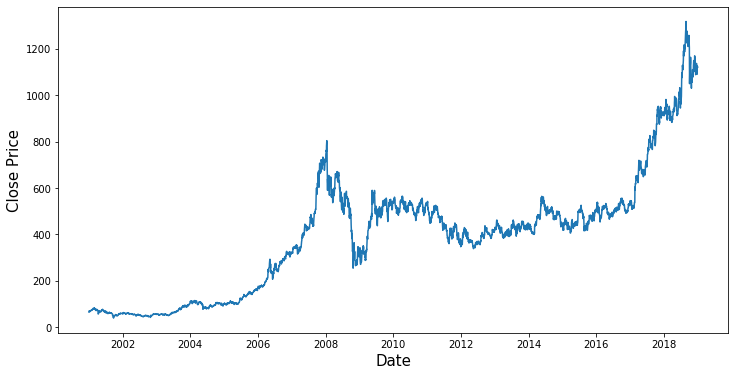

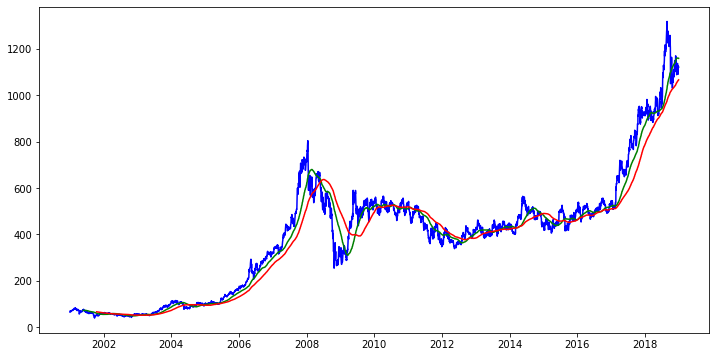

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(df["Close"])
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.show()


# Rolling mean
close_px = df['Close']
mavg_100 = close_px.rolling(window=100).mean()
mavg_200 = close_px.rolling(window=200).mean()
plt.figure(figsize = (12,6))
plt.plot(close_px,color='blue',label='Actual data')
plt.plot(mavg_100,color='green',label='Rolling 100 mean')
plt.plot(mavg_200,color='red',label='Rolling 200 mean')


In [0]:
from sklearn.metrics import mean_squared_error
rms=rms=np.sqrt(np.mean(np.power((close_px-mavg_200),2)))
print(rms)
#rms=np.sqrt(np.mean(np.power((close_px)-(mavg_200),2)))
rms=np.sqrt(np.mean(np.power((close_px-mavg_100),2)))
print(rms)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


76.6268698157514
51.675953006750575


In [0]:
import matplotlib.dates as mdates

# change the dates into ints for training 
dates_df = df.copy()
dates_df = dates_df.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['Date']

# convert to ints
dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

dates_df.tail()

,Date,Open,High,Low,Close,Volume,Currency
4471,737052.0,1101.80,1103.00,1086.50,1090.05,270420,INR
4472,737054.0,1087.00,1100.65,1066.55,1096.95,474920,INR
4473,737055.0,1105.00,1125.90,1104.45,1120.00,454770,INR
4474,737056.0,1123.30,1135.90,1122.00,1125.80,343130,INR
4475,737059.0,1127.15,1133.40,1116.60,1121.05,264250,INR


In [0]:
dates = dates_df['Date'].as_matrix()
prices = df['Close'].as_matrix()

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


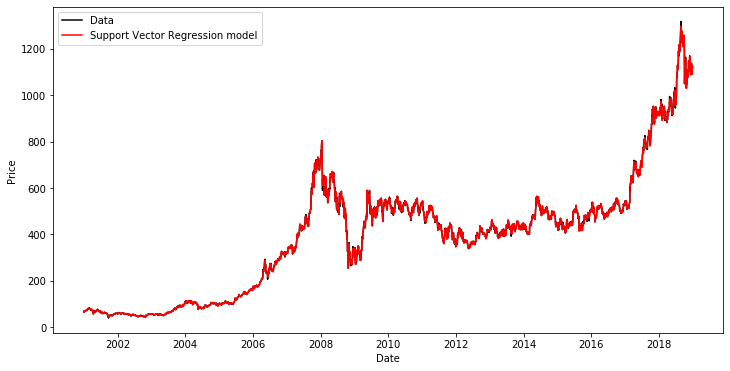

In [0]:
from sklearn.svm import SVR



svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'Support Vector Regression model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [0]:
from sklearn.metrics import mean_squared_error
svr_rbf_confidence=svr_rbf.score(dates,prices)
print(f"SVR Confidence: {round(svr_rbf_confidence*100,2)}%")
print(np.transpose(prices))
print(np.transpose(np.array(svr_rbf.predict(dates))))
#rootmean=np.sqrt(mean_squared_error((np.array(prices)),np.array(svr_rbf.predict(prices))))
rootmean=np.sqrt(np.mean(np.power(((np.transpose(np.array(prices)))-np.array(svr_rbf.predict(dates))),2)))
#rootmean=np.sqrt(np.mean(np.power((-),2)))
print(rootmean)

SVR Confidence: 99.99%
[[  64.82   67.65   68.1  ... 1120.   1125.8  1121.05]]
[  64.91967498   65.64959226   68.20001796 ... 1107.0078138  1125.90044693
 1120.95021617]
2.8486588583282884


In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)
lr.fit(dates,prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
clfpoly2 = make_pipeline(PolynomialFeatures(5), Ridge())
clfpoly2.fit(dates,prices)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.95147e-59): result may not be accurate.
  overwrite_a=True).T


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [0]:
lr_confidence=lr.score(dates,prices)
clfpoly2_conf=clfpoly2.score(dates,prices)
rms=np.sqrt(np.mean(np.power((np.transpose(np.array(prices))-np.array(lr.predict(dates))),2)))
print(f"Linear Regression RMSE:",rms)
rms=np.sqrt(np.mean(np.power((np.transpose(np.array(prices))-np.array(clfpoly2.predict(dates))),2)))
#rms=np.sqrt(np.mean(np.power((np.array(prices)-np.array(.predict(prices))),2)))
print(f"Polynomial Regression RMSE:",rms)
print(f"Linear Regression Confidence: {round(lr_confidence*100,2)}%")
print(f"Polynomial Regression Confidence: {round(clfpoly2_conf*100,2)}%")

Linear Regression RMSE: 337.64151503389434
Polynomial Regression RMSE: 345.0793547733305
Linear Regression Confidence: 70.22%
Polynomial Regression Confidence: 77.84%


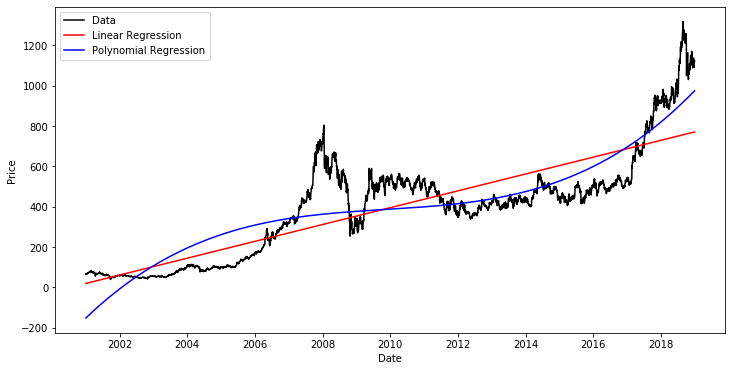

In [0]:
plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, lr.predict(dates), color= 'red', label= 'Linear Regression') 
plt.plot(org_dates, clfpoly2.predict(dates), color= 'blue', label= 'Polynomial Regression') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [0]:
df1.reset_index(level=0, inplace=True)
print(df1.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')


In [0]:
df1['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df1.index = df['Date']
print(df1)

In [0]:
data = df1.sort_index(ascending=True, axis=0)


In [0]:
new_data = pd.DataFrame(index=range(0,len(df1)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [0]:
from sklearn.preprocessing import MinMaxScaler
!pip install tensorflow
import tensorflow
!pip install keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [0]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [0]:
dataset = new_data.values

train = dataset[0:3750,:]
valid = dataset[3751:,:]

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [0]:
x_train, y_train = [], []
for i in range(200,len(train)):
    x_train.append(scaled_data[i-200:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [0]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
inputs = new_data[len(new_data) - len(valid) - 200:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where







Epoch 1/1


 - 2881s - loss: 4.9583e-04


In [0]:
X_test = []
for i in range(200,inputs.shape[0]):
    X_test.append(inputs[i-200:i,0])
X_test = np.array(X_test)


In [0]:
from sklearn.metrics import f1_score
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [0]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

49.22605310123542


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


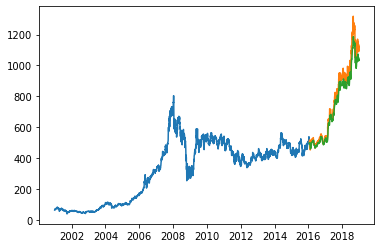

In [0]:
train = new_data[:3750]
valid = new_data[3751:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [0]:
!pip install nbconvert 